# Loan Approval Prediction

 Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

 `Your Goal`: The goal for this competition is to predict whether an applicant is approved for a loan.

## 1. Problem definition

How well can we predict if a person gets a loan or doesnt

## 2. Data

The data is downloaded from kaggle: https://www.kaggle.com/competitions/playground-series-s4e10/data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Loan Approval Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## 3. Evaluation

Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets.

## 4. Features

`person_age`: Applicant’s age in years.

`person_income`: Annual income of the applicant in USD.

`person_home_ownership`: Status of homeownership (e.g., Rent, Own, Mortgage).

`person_emp_length`: Length of employment in years.

`loan_intent`: Purpose of the loan (e.g., Education, Medical, Personal).

`loan_grade`: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.

`loan_amnt`: Total loan amount requested by the applicant.

`loan_int_rate`: Interest rate associated with the loan.

`loan_percent_income`: Percentage of the applicant’s income allocated towards loan repayment.

`cb_person_default_on_file`: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).

`cb_person_cred_hist_length`: Length of the applicant’s credit history in years.

`loan_status`: The approval status of the loan (approved or not approved).

 ## Importing all the tools we need

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,LabelEncoder

## Import the data

In [2]:
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")

### Data analysis

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
df_train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df_test.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### EDA

In [8]:
df_train.drop("id", axis=1, inplace=True)
df_test.drop("id", axis=1, inplace=True)

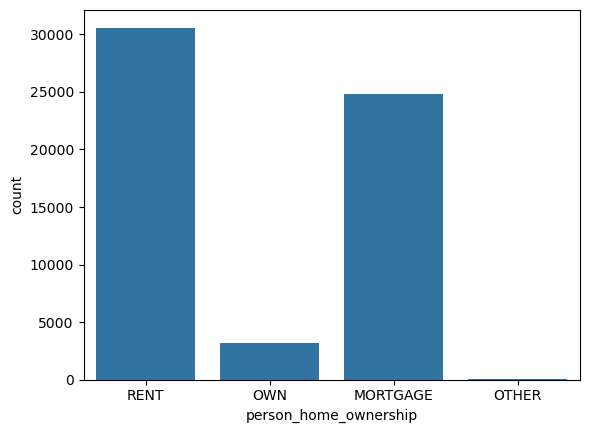

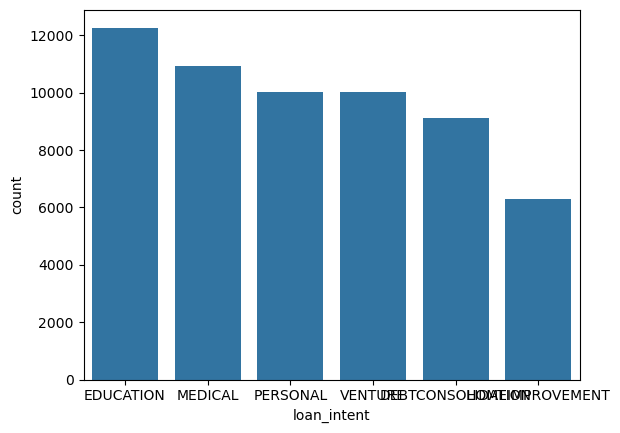

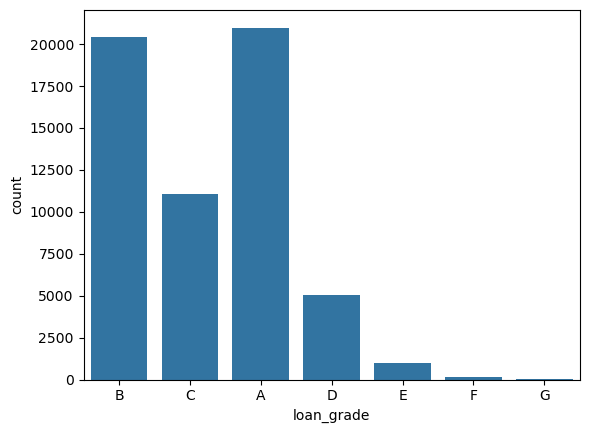

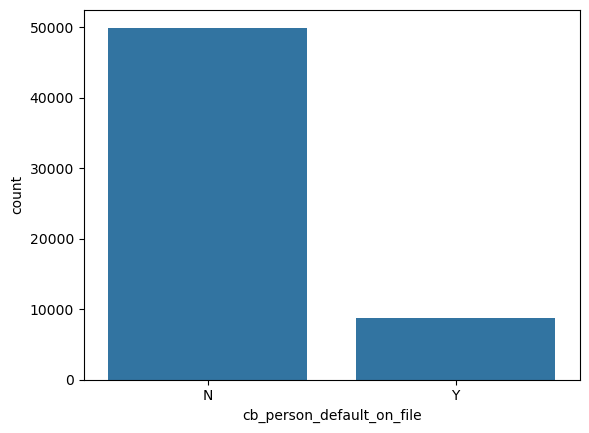

In [9]:
for label, content in df_train.items():
    if df_train[label].dtype == "O":
        sns.countplot(x=label, data = df_train)
        plt.show()

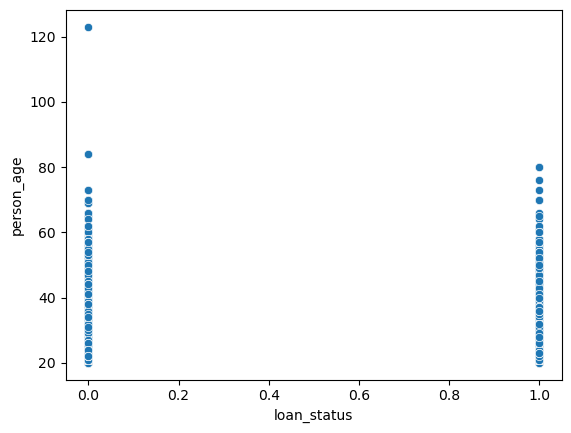

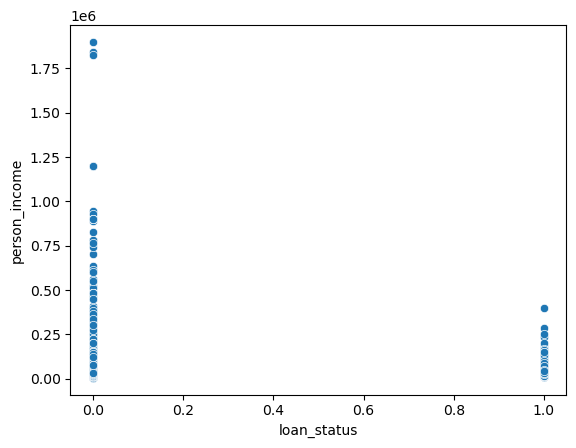

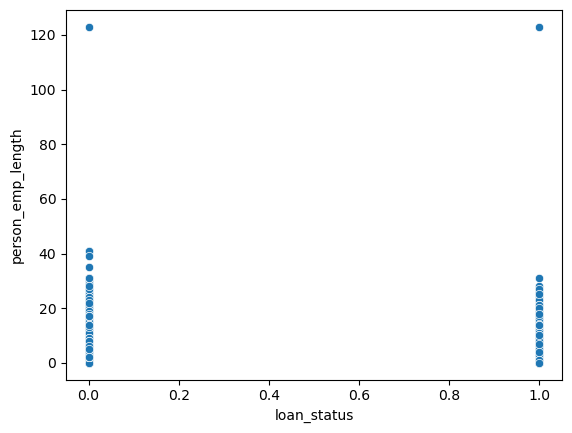

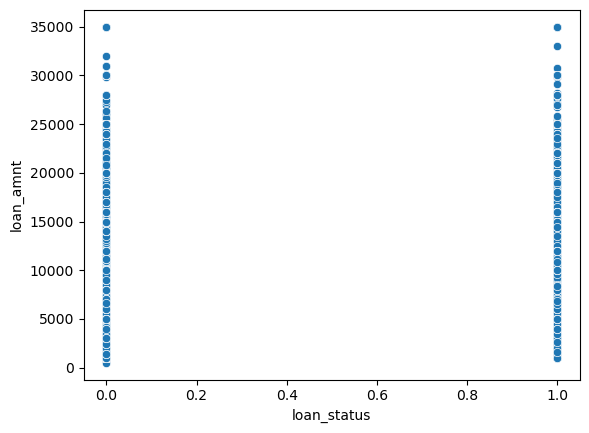

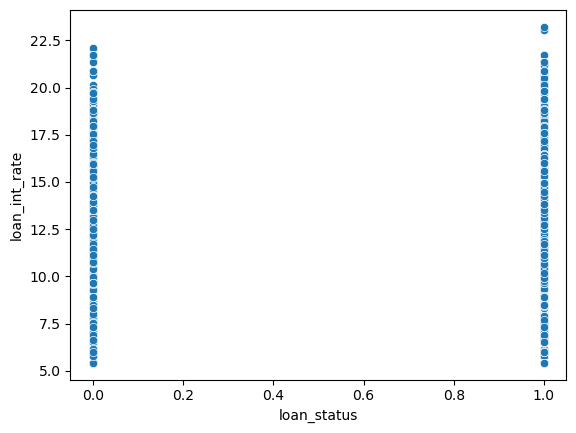

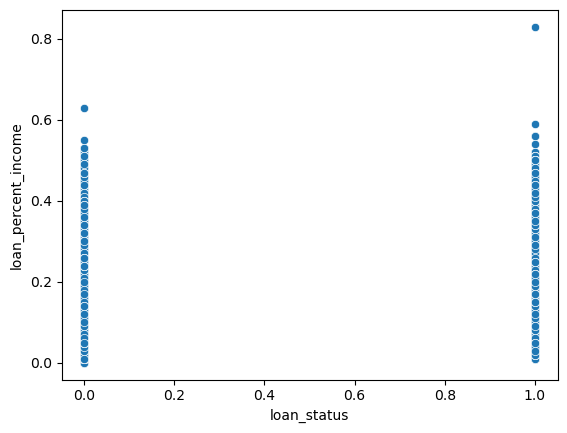

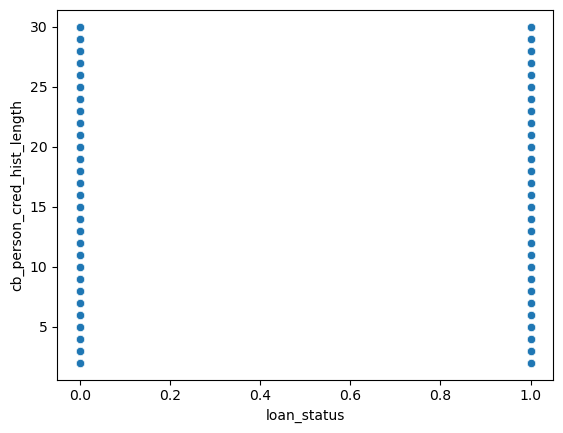

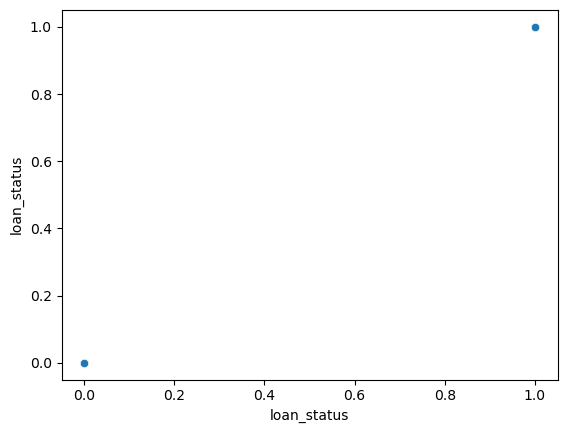

In [10]:
for col in df_train:
    if df_train[col].dtype != "O":
        sns.scatterplot(x = df_train["loan_status"], y=df_train[col])
        plt.show()

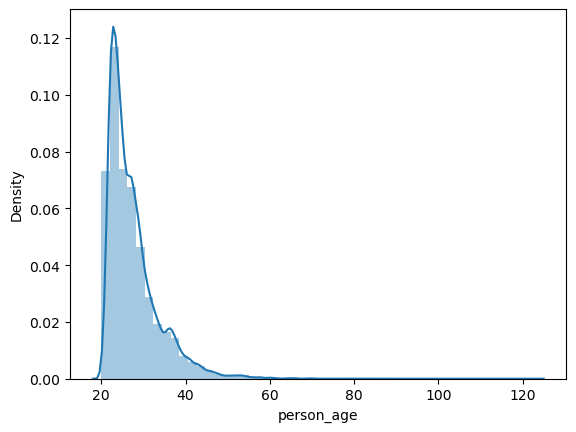

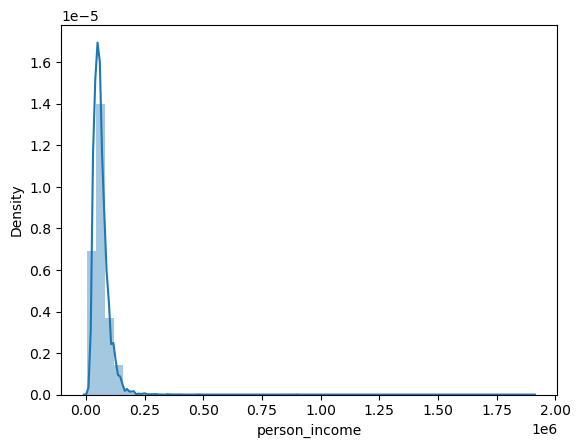

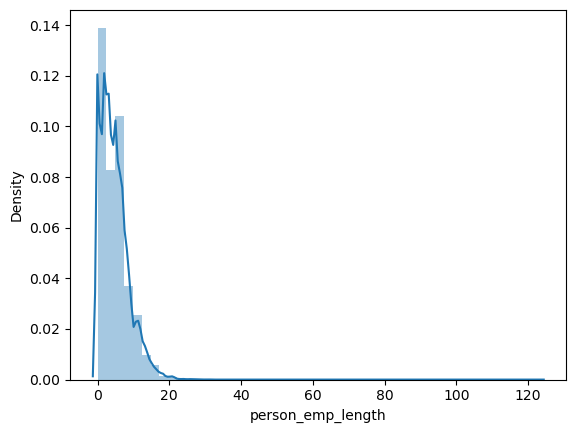

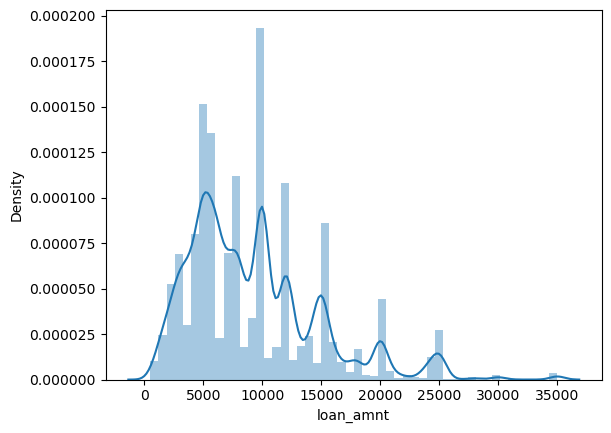

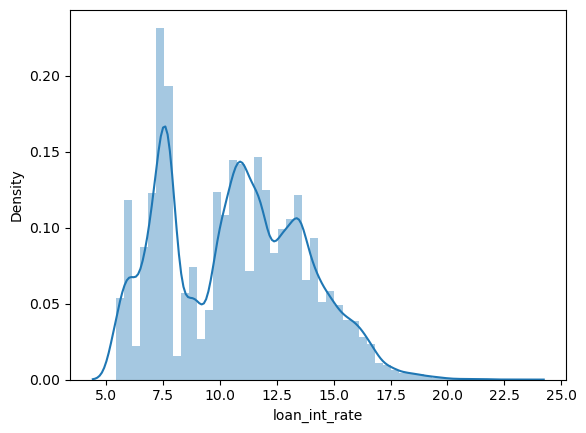

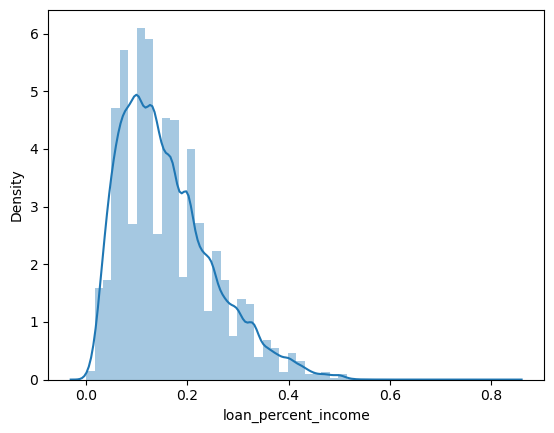

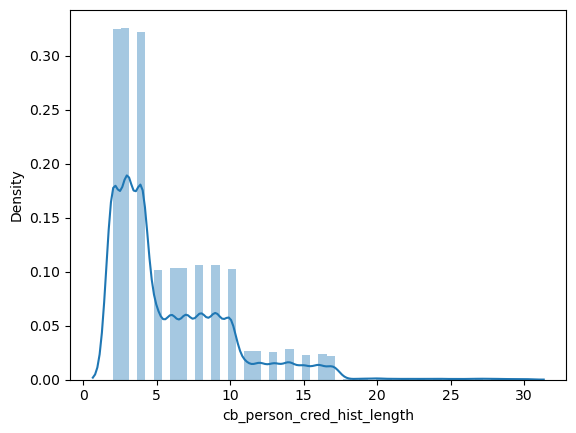

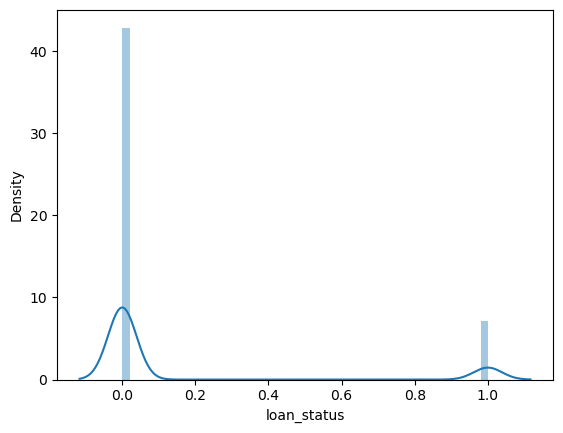

In [11]:
for col in df_train:
    if df_train[col].dtype != "O":
        sns.distplot(df_train[col])
        plt.show()

In [12]:
df_train = df_train.drop(df_train[df_train["person_age"]>70].index)
df_train = df_train.drop(df_train[df_train["person_income"]>0.8e+06].index)
df_train = df_train.drop(df_train[df_train["person_emp_length"]>60].index)
df_train = df_train.drop(df_train[df_train["loan_percent_income"]>0.6].index)

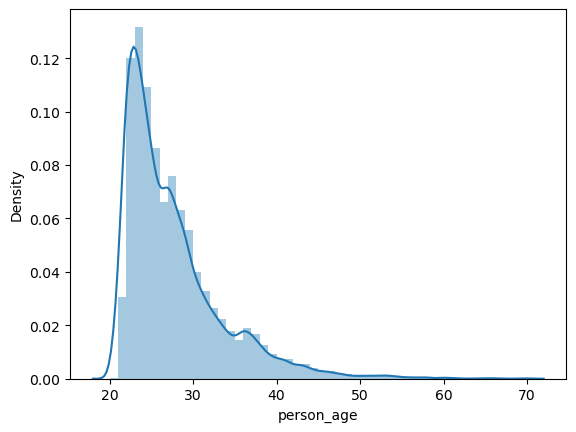

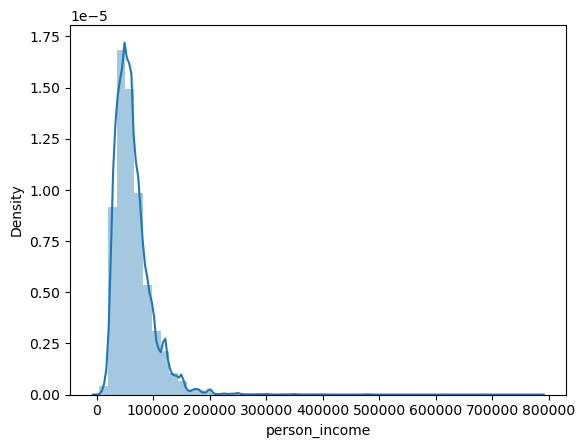

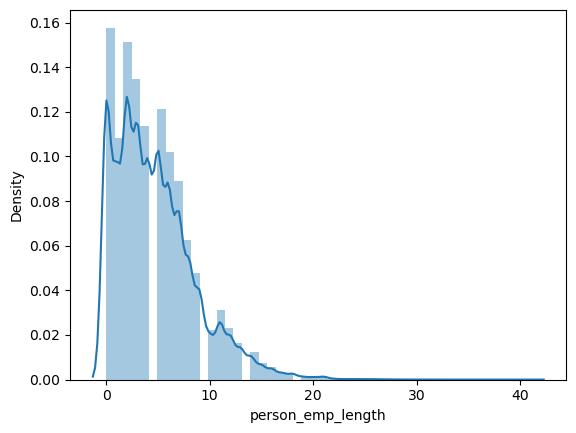

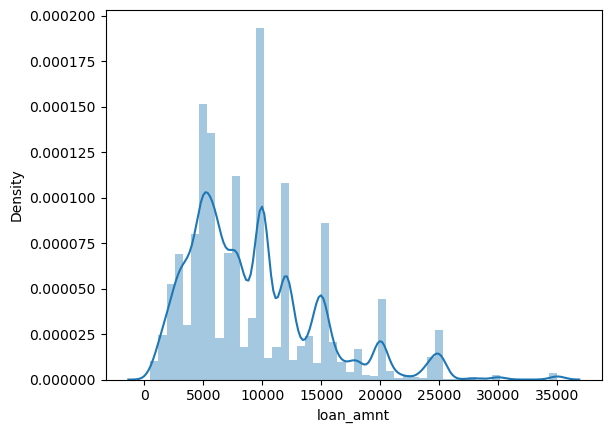

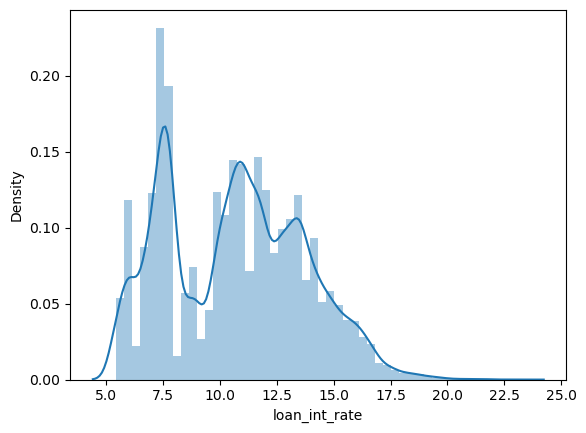

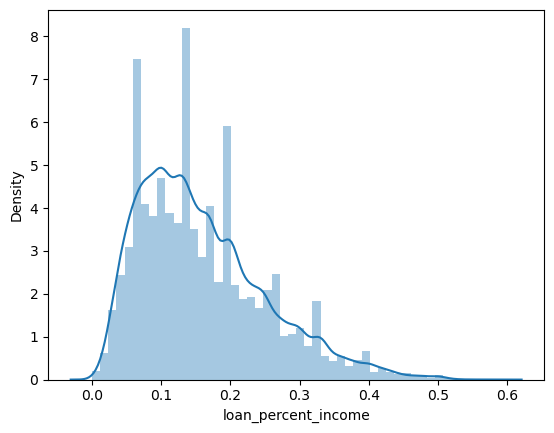

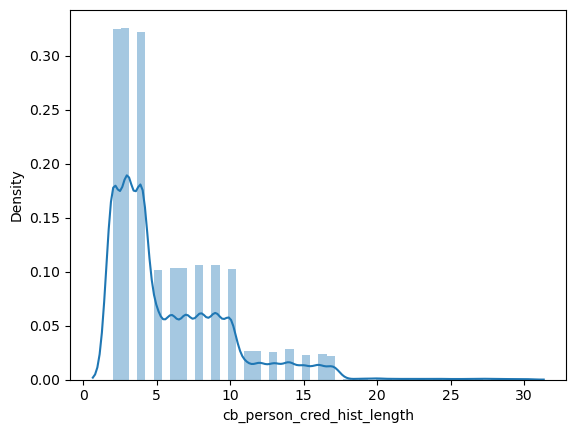

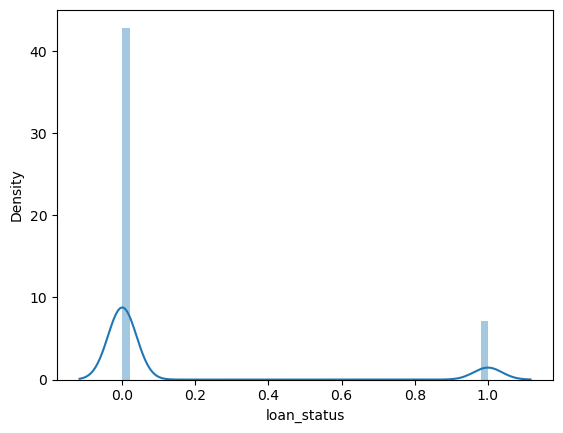

In [13]:
for col in df_train:
    if df_train[col].dtype != "O":
        sns.distplot(df_train[col])
        plt.show()

<Axes: >

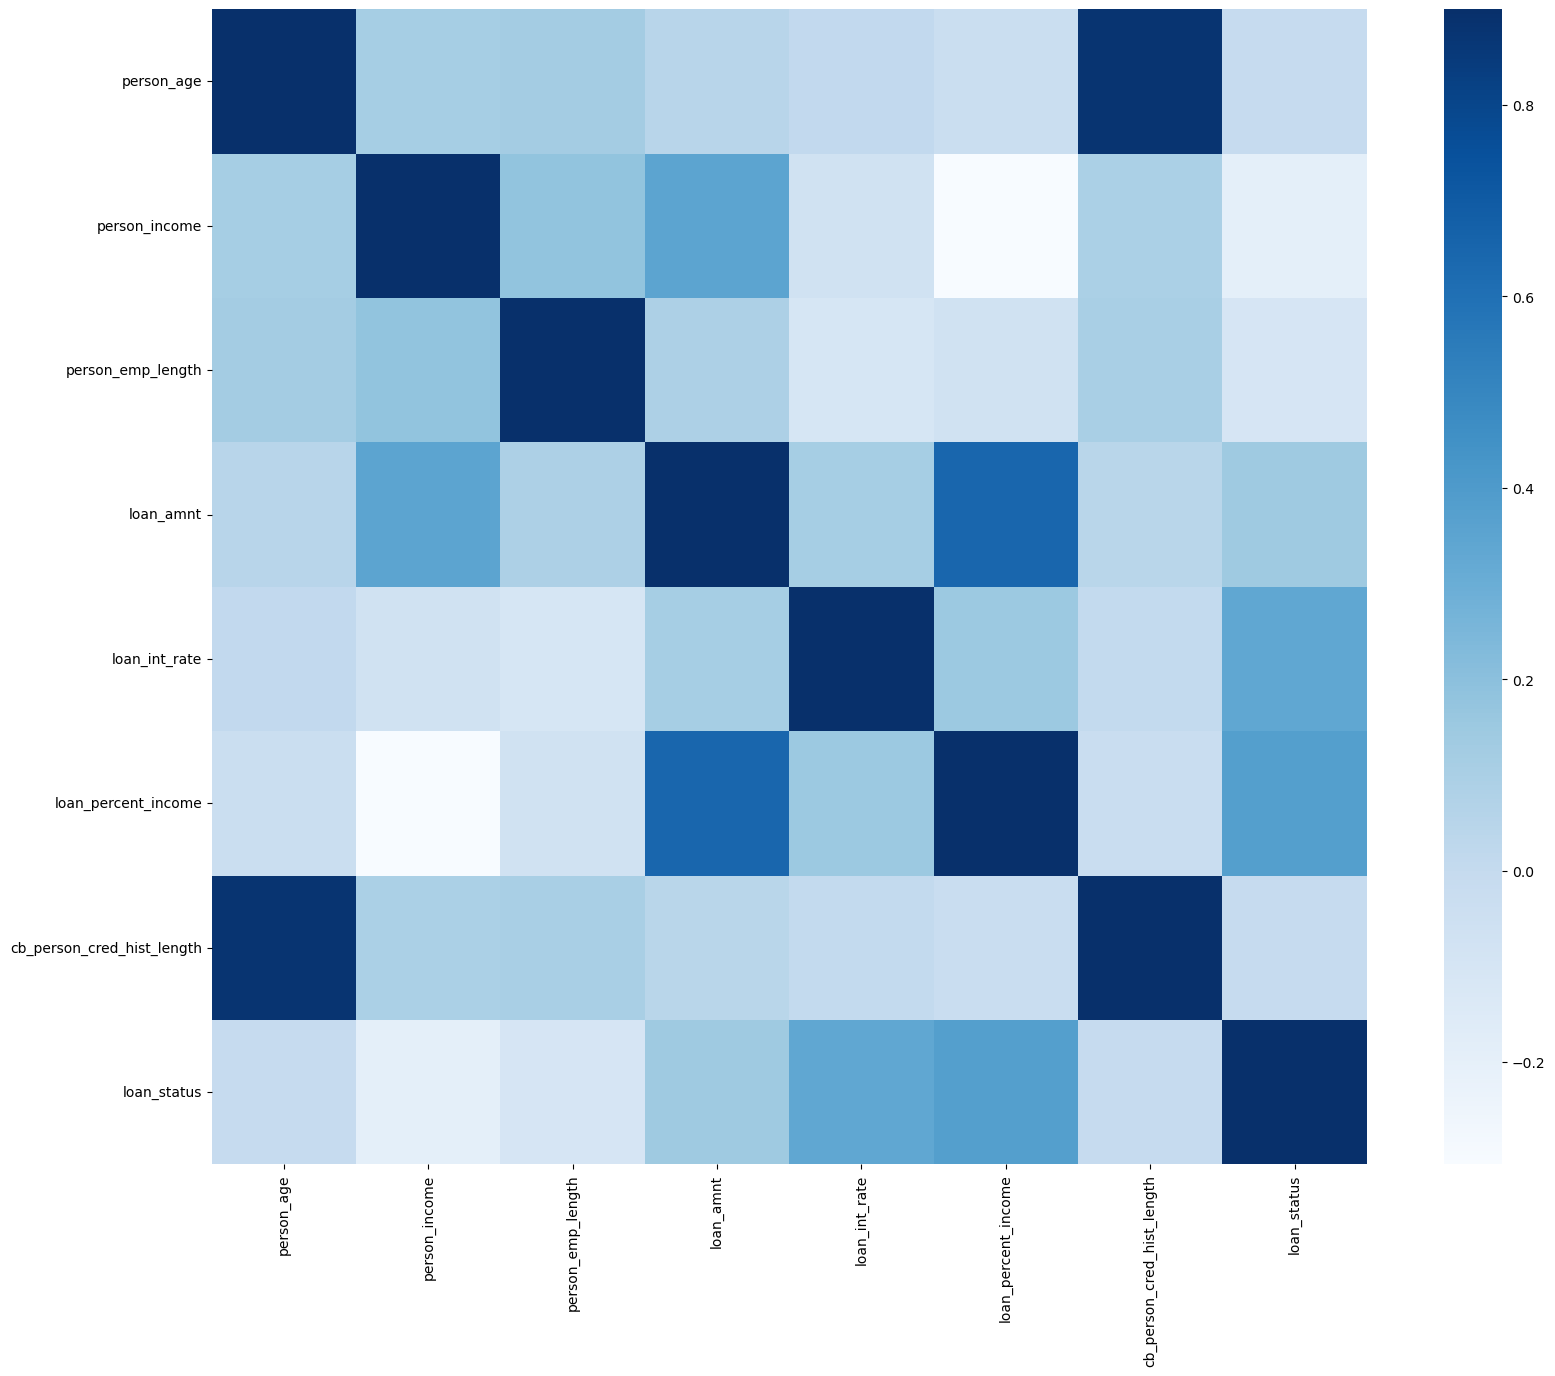

In [14]:
corr = df_train.corr(numeric_only=True)
plt.subplots(figsize=(20,15))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [15]:
def new_features(df):
    df["last_age_of_emp"] = df["person_age"] - df["person_emp_length"]
new_features(df_train)
new_features(df_test)

In [16]:
df_train.shape, df_test.shape

((58618, 13), (39098, 12))

### get_dummies

In [17]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

df_train.shape, df_test.shape

((58618, 28), (39098, 27))

## Modelling

### Creating the models dictionary and fitting all the baseline models

In [18]:
model_dict = {
    "Random Forest Classifier": RandomForestClassifier(),
    "LightBoost Classifier": LGBMClassifier(),
    "CatBoost Classfier": CatBoostClassifier()
}

In [19]:
X = df_train.drop("loan_status", axis=1)
y = df_train["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
def fit_and_score(model_dict, X_train, X_test, y_train, y_test):
    score_dict={}
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        y_preds = model.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, y_preds)
        score_dict[name] = score
    return score_dict

fit_and_score(model_dict, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 6674, number of negative: 40220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 46894, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142321 -> initscore=-1.796145
[LightGBM] [Info] Start training from score -1.796145
Learning rate set to 0.053272
0:	learn: 0.6288690	total: 175ms	remaining: 2m 55s
1:	learn: 0.5685253	total: 198ms	remaining: 1m 39s
2:	learn: 0.5188836	total: 222ms	remaining: 1m 13s
3:	learn: 0.4757700	total: 243ms	remaining: 1m
4:	learn: 0.4371018	total: 265ms	remaining: 52.8s
5:	learn: 0.4063229	total: 284ms	remaining: 47.1s
6:	learn: 0.3779781	total: 303ms	remaining: 42.9s
7:	learn: 0.3547673	total: 320ms	remaining: 39.7s
8:	learn: 0.33

{'Random Forest Classifier': 0.9349123713980434,
 'LightBoost Classifier': 0.9577895829586103,
 'CatBoost Classfier': 0.9578675749753724}

### Hyperparameter tuning for LightBoost

In [21]:
import optuna

In [22]:
def objective(trial):
    param = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        }
    model = LGBMClassifier(**param, silent=True)
    model.fit(X_train, y_train)
    y_preds = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_preds)
    return score

In [23]:
"""study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
"""

"study = optuna.create_study(direction='maximize')\nstudy.optimize(objective, n_trials=100)\n"

In [25]:
#print('Best score:', study.best_value)

### hyperparameter tuning for CatBoost

In [26]:
"""
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostClassifier(**params, silent=True)
    model.fit(X_train, y_train)
    y_preds = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_preds)
    return score
"""

'\ndef objective(trial):\n    params = {\n        "iterations": 1000,\n        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),\n        "depth": trial.suggest_int("depth", 1, 10),\n        "subsample": trial.suggest_float("subsample", 0.05, 1.0),\n        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),\n        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),\n    }\n\n    model = CatBoostClassifier(**params, silent=True)\n    model.fit(X_train, y_train)\n    y_preds = model.predict_proba(X_test)[:, 1]\n    score = roc_auc_score(y_test, y_preds)\n    return score\n'

### Making predictions on the test data

In [27]:
df_sub = pd.read_csv("data/sample_submission.csv")

In [28]:
# One more try

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),  # Number of boosting iterations
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),  # Learning rate
        'depth': trial.suggest_int('depth', 4, 10),  # Depth of the tree
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),  # L2 regularization
        'border_count': trial.suggest_int('border_count', 32, 255),  # Number of split points for numerical features
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),  # Controls the amount of randomness
        'random_strength': trial.suggest_loguniform('random_strength', 1e-9, 10),  # Randomness in the tree construction
    }
    model = CatBoostClassifier(**params, silent=True)
    model.fit(X_train, y_train)
    y_preds = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_preds)
    return score

In [29]:
study4 = optuna.create_study(direction='maximize')
study4.optimize(objective, n_trials=100)

[I 2024-10-09 19:03:56,913] A new study created in memory with name: no-name-357f22d7-cc6a-4a4b-8194-27e2ebd55bec
[I 2024-10-09 19:04:08,547] Trial 0 finished with value: 0.9337479109812997 and parameters: {'iterations': 751, 'learning_rate': 0.0035962247009174867, 'depth': 6, 'l2_leaf_reg': 4.824664004523988, 'border_count': 37, 'bagging_temperature': 0.23650419509563292, 'random_strength': 0.0041896153346782355}. Best is trial 0 with value: 0.9337479109812997.
[I 2024-10-09 19:04:26,926] Trial 1 finished with value: 0.9432954858137315 and parameters: {'iterations': 433, 'learning_rate': 0.008580801071438581, 'depth': 10, 'l2_leaf_reg': 4.312055673395245, 'border_count': 202, 'bagging_temperature': 0.38283330215736333, 'random_strength': 0.027921847105697374}. Best is trial 1 with value: 0.9432954858137315.
[I 2024-10-09 19:04:31,708] Trial 2 finished with value: 0.9564341775966666 and parameters: {'iterations': 329, 'learning_rate': 0.13366001153126894, 'depth': 5, 'l2_leaf_reg': 1.4

In [30]:
model = CatBoostClassifier(**study4.best_params)
model.fit(X_train,y_train)
y_preds = model.predict(df_test)
df_sub["loan_status"] = y_preds
df_sub.to_csv("submission5.csv", index = False)

0:	learn: 0.4455290	total: 19.1ms	remaining: 17.2s
1:	learn: 0.3308385	total: 37.5ms	remaining: 16.8s
2:	learn: 0.2764426	total: 55.6ms	remaining: 16.6s
3:	learn: 0.2496289	total: 74.3ms	remaining: 16.6s
4:	learn: 0.2322683	total: 94.1ms	remaining: 16.8s
5:	learn: 0.2195878	total: 116ms	remaining: 17.2s
6:	learn: 0.2127395	total: 136ms	remaining: 17.3s
7:	learn: 0.2068342	total: 157ms	remaining: 17.4s
8:	learn: 0.2022201	total: 179ms	remaining: 17.6s
9:	learn: 0.1981606	total: 198ms	remaining: 17.6s
10:	learn: 0.1953178	total: 219ms	remaining: 17.6s
11:	learn: 0.1931855	total: 243ms	remaining: 17.9s
12:	learn: 0.1917064	total: 271ms	remaining: 18.4s
13:	learn: 0.1891576	total: 295ms	remaining: 18.6s
14:	learn: 0.1868489	total: 318ms	remaining: 18.7s
15:	learn: 0.1840891	total: 338ms	remaining: 18.6s
16:	learn: 0.1825744	total: 358ms	remaining: 18.5s
17:	learn: 0.1810507	total: 381ms	remaining: 18.6s
18:	learn: 0.1797353	total: 401ms	remaining: 18.5s
19:	learn: 0.1786889	total: 421ms	re

In [32]:
model = CatBoostClassifier(**study4.best_params)
model.fit(X,y)
y_preds = model.predict(df_test)
df_sub["loan_status"] = y_preds
df_sub.to_csv("submission6.csv", index = False)

0:	learn: 0.4444747	total: 21.9ms	remaining: 19.7s
1:	learn: 0.3295329	total: 38.2ms	remaining: 17.1s
2:	learn: 0.2753326	total: 54.9ms	remaining: 16.4s
3:	learn: 0.2487077	total: 70ms	remaining: 15.6s
4:	learn: 0.2314055	total: 84.8ms	remaining: 15.2s
5:	learn: 0.2189979	total: 99.2ms	remaining: 14.8s
6:	learn: 0.2111266	total: 114ms	remaining: 14.5s
7:	learn: 0.2049385	total: 129ms	remaining: 14.3s
8:	learn: 0.2008615	total: 143ms	remaining: 14.2s
9:	learn: 0.1966060	total: 157ms	remaining: 14s
10:	learn: 0.1931505	total: 173ms	remaining: 13.9s
11:	learn: 0.1899766	total: 189ms	remaining: 14s
12:	learn: 0.1882384	total: 206ms	remaining: 14s
13:	learn: 0.1855437	total: 221ms	remaining: 14s
14:	learn: 0.1835995	total: 238ms	remaining: 14s
15:	learn: 0.1814597	total: 256ms	remaining: 14.1s
16:	learn: 0.1800755	total: 272ms	remaining: 14.1s
17:	learn: 0.1790541	total: 289ms	remaining: 14.1s
18:	learn: 0.1780736	total: 300ms	remaining: 13.9s
19:	learn: 0.1770468	total: 313ms	remaining: 13

In [33]:
model.score(X_test,y_test)

0.9637495735243944